In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers

In [4]:
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

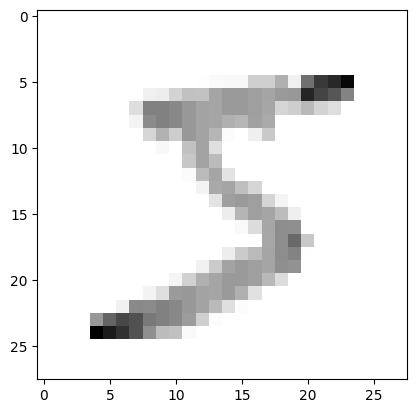

In [8]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [9]:
#building the network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [10]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1592/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8362 - loss: 0.5789

In [ ]:
predictions = model.predict([X_test])

In [ ]:
import numpy as np

print(predictions[0])

In [ ]:
print(y_test[0])

In [ ]:
plt.imshow(X_test[0], cmap = plt.cm.binary)

In [ ]:
print(predictions[52])
print(y_test[52])

In [ ]:
plt.imshow(X_test[52], cmap = plt.cm.binary)

In [ ]:
plt.imshow(X_test[52])

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

In [ ]:
# Visualize some predictions
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='binary')
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f"Pred: {pred_label}, True: {true_label}", color=color)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', ax=ax)
plt.title('MNIST Confusion Matrix')
plt.show()

In [ ]:
# Save the model
model.save('mnist_model.keras')
print("Model saved!")